In [1]:
import pandas as pd
datamart = pd.read_csv('datamart_rfm.csv')

In [2]:
datamart.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


In [3]:
Spend =  [137,335,172,355,303,233,244,229]
CustomerID = [0,1,2,3,4,5,6,7]

In [4]:
dtuple = list(zip(CustomerID,Spend))

In [5]:
df = pd.DataFrame(dtuple, columns=['CustomerID', 'Spend'])

In [6]:
df

,CustomerID,Spend
0,0,137
1,1,335
2,2,172
3,3,355
4,4,303
5,5,233
6,6,244
7,7,229


In [7]:
spend_quartile = pd.qcut(df['Spend'], q=4, labels=range(1,5))

In [8]:
df['Spend_Quartile'] = spend_quartile

In [9]:
print(df.sort_values('Spend'))

   CustomerID  Spend Spend_Quartile
0           0    137              1
2           2    172              1
7           7    229              2
5           5    233              2
6           6    244              3
4           4    303              3
1           1    335              4
3           3    355              4


In [10]:
Recency_Days =  [37,235,396,72,255,393,203,193]
CustomerID = [0,1,2,3,4,5,6,7]

In [11]:
dtuple = list(zip(CustomerID, Recency_Days))

In [12]:
data = pd.DataFrame(dtuple, columns=['CustomerID', 'Recency_Days'])

In [13]:
data

,CustomerID,Recency_Days
0,0,37
1,1,235
2,2,396
3,3,72
4,4,255
5,5,393
6,6,203
7,7,193


In [14]:
# Store labels from 4 to 1 in a decreasing order
r_labels = list(range(4, 0, -1))

# Create a spend quartile with 4 groups and pass the previously created labels 
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Assign the quartile values to the Recency_Quartile column in `data`
data['Recency_Quartile'] = recency_quartiles 

# Print `data` with sorted Recency_Days values
print(data.sort_values('Recency_Days'))

   CustomerID  Recency_Days Recency_Quartile
0           0            37                4
3           3            72                4
7           7           193                3
6           6           203                3
1           1           235                2
4           4           255                2
5           5           393                1
2           2           396                1


In [43]:
import pandas as pd
online = pd.read_csv('online12M.csv')
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom


In [44]:
print('Min:{}; Max:{}'.format(min(online.InvoiceDate),
                             max(online.InvoiceDate)))

Min:2010-12-10; Max:2011-12-09


In [45]:
online['InvoiceDate']=pd.to_datetime(online['InvoiceDate'])

In [46]:
import datetime
snapshot_date = max(online.InvoiceDate) + datetime.timedelta(days=1)
tenure = min(online.InvoiceDate) + datetime.timedelta(days=1)

In [35]:
snapshot_date

Timestamp('2011-12-10 00:00:00')

In [47]:
tenure

Timestamp('2010-12-11 00:00:00')

In [56]:
online['TotalSum'] = online['Quantity']*online['UnitPrice']

In [37]:
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, #}),
    'InvoiceNo': 'count', #})#,
    'TotalSum': 'sum'})

In [ ]:
# online['Tenure'] = online['InvoiceDate']

In [62]:
# datamart = online.groupby(['CustomerID']).agg({
#     'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
#     'InvoiceNo': 'count', #})#,
#     'TotalSum': 'sum',
#     'Tenure': lambda x: ((tenure - x.max())*-1).days,})

In [64]:
datamart.rename(columns={'InvoiceDate':'Recency',
                        'InvoiceNo':'Frequency',
                        'TotalSum':'MonetaryValue'},inplace=True)

In [65]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,3,25,948.70,361
12748,1,888,7046.16,363
12749,4,37,813.45,360
12820,4,17,268.02,360
12822,71,9,146.15,293


In [22]:
datamart.rename(columns={'InvoiceDate':'Recency',
                        'InvoiceNo':'Frequency',
                        'TotalSum':'MonetaryValue'},inplace=True)

In [23]:
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,948.70
12748,1,888,7046.16
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15


In [24]:
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart['Recency'],4,labels=r_labels)
datamart = datamart.assign(R=r_quartiles.values)

In [25]:
datamart.head()

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12747,3,25,948.70,4
12748,1,888,7046.16,4
12749,4,37,813.45,4
12820,4,17,268.02,4
12822,71,9,146.15,2


In [26]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'],4,labels= f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'],4,labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

In [27]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12747,3,25,948.70,4,4,4
12748,1,888,7046.16,4,4,4
12749,4,37,813.45,4,4,4
12820,4,17,268.02,4,3,3
12822,71,9,146.15,2,2,3


In [28]:
def join_rfm(x):return str(x['R'])+str(x['F'])+str(x['M'])
datamart['RFM_Segment']=datamart.apply(join_rfm,axis=1)
datamart['RFM_Score'] = datamart[['R','F', 'M']].sum(axis=1)

In [29]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,3,25,948.70,4,4,4,444,12.0
12748,1,888,7046.16,4,4,4,444,12.0
12749,4,37,813.45,4,4,4,444,12.0
12820,4,17,268.02,4,3,3,433,10.0
12822,71,9,146.15,2,2,3,223,7.0


In [30]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    372
111    345
211    169
344    156
233    129
222    128
333    120
122    117
311    114
433    113
dtype: int64

In [31]:
datamart[datamart['RFM_Segment'] == '111'][:5]

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12837,174,2,10.55,1,1,1,111,3.0
12852,295,2,32.55,1,1,1,111,3.0
12902,265,4,42.03,1,1,1,111,3.0
12915,149,2,35.90,1,1,1,111,3.0
12922,162,4,57.24,1,1,1,111,3.0


In [32]:
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         246.9       2.1          28.4   345
4.0         162.2       3.1          47.8   337
5.0         138.9       4.3          78.2   393
6.0         101.0       6.3         146.3   444
7.0          78.0       8.5         160.2   382
8.0          62.6      12.8         196.3   376
9.0          46.8      16.7         330.3   345
10.0         31.9      24.0         443.1   355
11.0         21.8      38.9         705.3   294
12.0          8.0      75.6        1653.9   372

In [33]:
def segment_me(df):
    if df['RFM_Score']>=9:
        return 'Gold'
    elif (df['RFM_Score']>=5) and (df['RFM_Score']<9):
        return 'Silver'
    else:
        return 'Bronze'

In [34]:
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

In [35]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12747,3,25,948.70,4,4,4,444,12.0,Gold
12748,1,888,7046.16,4,4,4,444,12.0,Gold
12749,4,37,813.45,4,4,4,444,12.0,Gold
12820,4,17,268.02,4,3,3,433,10.0,Gold
12822,71,9,146.15,2,2,3,223,7.0,Silver


In [36]:
datamart.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            205.0       2.6          38.0   682
Gold               27.0      39.4         800.8  1366
Silver             95.8       7.9         144.6  1595

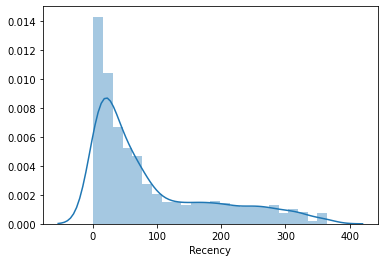

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(datamart['Recency'])
plt.show()

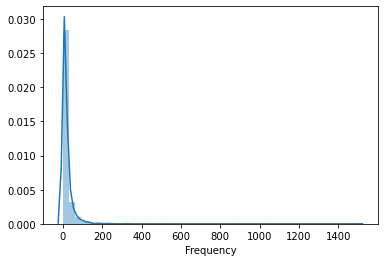

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(datamart['Frequency'])
plt.show()

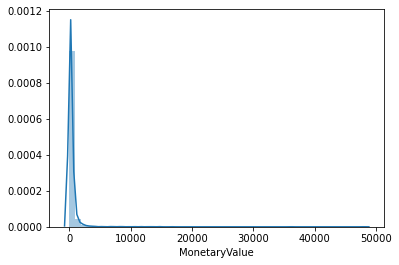

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(datamart['MonetaryValue'])
plt.show()

In [61]:
datamart_rfm = pd.read_csv('datamart_rfm.csv')
datamart_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12747,3,25,948.70
1,12748,1,888,7046.16
2,12749,4,37,813.45
3,12820,4,17,268.02
4,12822,71,9,146.15


In [90]:
import numpy as np
df = datamart_rfm[['Recency', 'Frequency', 'MonetaryValue']]

In [93]:
from sklearn.preprocessing import StandardScaler
log = np.log(df)

scaler = StandardScaler()
scaler.fit(log)

norm = scaler.transform(log)
datamart_normalized = pd.DataFrame(data=norm, index=df.index, columns=df.columns)

In [95]:
datamart_normalized.describe()

,Recency,Frequency,MonetaryValue
count,3.643000e+03,3.643000e+03,3.643000e+03
mean,-4.175146e-17,1.724152e-16,3.380039e-16
std,1.000137e+00,1.000137e+00,1.000137e+00
min,-2.814518e+00,-1.794731e+00,-4.093550e+00
25%,-6.373949e-01,-6.491795e-01,-6.579180e-01
50%,9.268036e-02,2.092505e-02,-1.489805e-02
75%,8.340401e-01,7.210817e-01,6.692948e-01
max,1.547876e+00,4.246826e+00,4.459466e+00
